# Facilities

District-level information was obtained online, through the Ministry of Finance online "Fiscal Transfers" database <cite data-cite="otims_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2018.md">(otims_2018)</a></cite>. Health facility information was obtained from the 2017 Health Facility Master List, which we found on the document-sharing website Scribd.com <cite data-cite="mohdhi2017"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/mohdhi2017.md">(mohdhi2017)</a></cite>. Data was extracted with the Tabula software <cite data-cite="tabula_2018"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/tabula_2018.md">(tabula_2018)</a></cite>.

### Master facility list pre-processing
After extraction, data from the master facility list were compared against summary tables from the same document to identify any missing data. Changes were needed in four districts:
1. The Health Facility Master List claimed that there were 32 operating health facilities in the __Amuru__ district, but did not list any. For this district, 26 facilities were identified from the budgeting office data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>. An additional three facilities (for a total of 29) were identified from 2012 health infastructure data: ST. AUGUSTINE Health Center II, Otwee Health Center III, and Pabbo Health Centre III <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. There were assigned a sub-county NHPI of SC8ZISZD6 (Amuru town council, Amoyokoma Parish)
2. There were also no facilities listed for the __Kibaale__ district, though the document listed 16 facilities (7 of which are HCIII, 1 HC IV, 1 hospital) in a summary table (Table 8). This is a new district, created in July 2016, when the previous Kibaale District was split into Kagadi, Kakumiro and Kibaale. Eight facilities were identified in the budgeting data <cite data-cite="otims_2016"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/otims_2016.md">(otims_2016)</a></cite>, and two additional were identified with the infastructure data <cite data-cite="hid2012"><a href="https://github.com/alexgoodell/uganda-model/blob/master/refs/cite-md/hid2012.md">(hid2012)</a></cite>. This process thus identified a total of 5 HC III's, 1 HC IV, and 1 hospital. There were assigned a sub-country of SCLMS8IG1 (Kibaale town council, Ruguuza Parish).
3. The __Mityana__ district was missing its 24th facility, reporting 65 of 66 facilities. According to table 5, this district has a hospital. After reviewing the budgeting data, Mityana Hospital was identified and added to our database. It was assigned a random sub-county within Mityana: SC96Q5BX1 (Bulera Subcounty, Kakonde Parish)
4. Three facilites in the __Mukono__ district (68: Royal Family Clinic Clinic, 88:	Trinity Clinic Clinic, 91: Vine Medical centre Clinic) did not have a sub-county NHPI. These facilities were assigned a sub-county NHPI of SCTMPU7S6 (for the Mukono Municipality, Nantaburirwa Parish).

In [1]:
# Import dependencies
import sys, os
sys.path.append(os.path.join(os.path.dirname(''), '..'))
from lib.dependencies import *
from lib import stats_util as su
import config
import json

In [2]:
# Let's start a dataframe with district information. 
# I've gotten most of this data from http://www.budget.go.ug/fiscal_transfers
# The following is the code that was used to create the file -- no longer in use, just grab the CSV

'''
# get the population data as skeleton - create dataframe
url = 'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MjA3'
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page, "html5lib")
table = soup.select_one("table.dataset")
# headers = [th.text.encode("utf-8") for th in table.select("tr th")]
districts = pd.read_html(str(table))[0]
districts = districts.set_index('Vote code')

# urls for the remaining columns we want
urls = [ 
# hard to reach
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTA3',
# pop per health fac    
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Mjc3',
# rural pop
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NjA3',
# public hospitals
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MDQ4',
# is district?
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/MzU2',
# poverty headcount
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDMy',
# is municiplality
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/NDc2',
# distance from kampala (cities)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/Njc2',
# distance from kampala (districts)
'http://www.budget.go.ug/fiscal_transfers/variable/show_dataset/var/OTU2'
]

for url in urls:
    page = urllib2.urlopen(url).read()
    soup = BeautifulSoup(page, "html5lib")
    table = soup.select_one("table.dataset")
    nd = pd.read_html(str(table))[0]
    nd = nd.set_index('Vote code')
    districts = pd.concat([districts, nd], axis=1)

# Remove duplicated columns
districts = districts.loc[:,~districts.columns.duplicated()]

# Export
districts.to_csv("districts_20-March-2018.csv")

'''

districts = pd.read_csv(config.data_path + '/budget-office/districts_20-March-2018.csv')

rename = {
'Region': 'region_name',
'District': 'district_name',
# can't use abbv "pop" on its own bc protected var
'Population (2015/16)': 'population', 
'Hard to Reach, Hard to Stay (2015/16)': 'is_hard_to_reach',
'Population per health facility (2015/16)': 'pop_per_health_fac',
'Rural Population (2015/16)': 'rural_pop',
'Constant (Public or PNFP Hospitals) (2015/16)': 'public_hosp',
'Constant (District) (2015/16)': 'is_district', 
'Poverty Headcount (2015/16)': 'poverty_pop',
'Constant (Municipality) (2015/16)': 'is_city',
'Distance from Kampala (Municipality) (2015/16)': 'distance_from_kampala_city',
'Distance from Kampala (District) (2015/16)': 'distance_from_kampala_district' 
}

# Rename columns to more useful 
districts = districts.rename(columns=rename)

# Combined distance from kampala (different columns for same variable)
districts['distance_from_kampala'] = districts['distance_from_kampala_district'] + districts['distance_from_kampala_city'] 
districts = districts.drop(columns=['distance_from_kampala_district','distance_from_kampala_city'])

districts = su.clean_columns(districts)

# seperate municipalities - 2 is true for is_district
municipalities = districts[districts.is_city == 1]
districts = districts[districts.is_district == 2]

# Unfortunately, this list of districts did not include a row for kampala! 
# I will add this manually here....

# get another district in the central region

import copy
d = copy.deepcopy(districts.loc[districts.district_name == 'Bukomansimbi District']) # deep copy
d['district_name'] = 'Kampala District'
# population per (UBS2017) https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/szh7lzsIKv.jpg
d['population'] = 1528800
# per 2014 census
d['rural_pop'] = 0
# these are by subregion, so easy to fill out - also see 
# https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/LSYQYveANZ.jpg
d['poverty_pop'] = 0.037
d['is_district'] = 2
d['is_city'] = 0
d['public_hosp'] = 1
d['distance_from_kampala'] = 0
d['is_hard_to_reach'] = 0
d['vote_code'] = 122
# below estimate from ~1392 health units UBS2017
d['pop_per_health_fac'] = 1098.0
# facilities = districts.append(d, ignore_index=True)
districts = districts.append(d, ignore_index=True)



In [3]:
# Import the data from the mohdhi2017 facilities list - using excel because CSV caused 
# line-splitting problems (some cells have returns)
facilities = pd.read_excel(config.data_path + "/moh-div-health-info/facilities.xlsx", sheet_name="facilities", header=0)

# make splitter function
splitter = lambda x: pd.Series([i for i in reversed(x.split('/'))])

# split HSDT Code (see page 7 of mohdhi2017 for details of HSDT codes)
# note: after data cleaning, some facilities required manual setting of subcounty NHPI.
# This was accomplished by setting the facility HSDT code to SCXXXXXX/NA/NA, where X's = SC NHPI
facilities[['parish_level_fac_id', 'parish_nhpi', 'subcounty_nhpi']] = facilities['HSDT Code'].apply(splitter)

# drop uneeded columns
facilities = facilities.drop(columns={'District_name'})

# Load the subcounty list - used to link facilities to their district
subcounties = pd.read_csv(config.data_path + "/moh-div-health-info/subcounties.csv")
rename = {'NHPI Code': 'subcounty_nhpi', 'Name': 'subcounty_name', 
          'HSDT Code': 'subcounty_full_hsdt_code', 'County': 'county_name', 
          'District': 'district_name',
          'Subregion': 'subregion_name'}
subcounties = subcounties.rename(columns=rename)
subcounties = subcounties.drop(columns={'#'})
subcounties.subcounty_nhpi = subcounties.subcounty_nhpi.str.strip()

# Add the subcounty data to the facilites list
# This will allow us to link the facilites to their district
facilities = facilities.join(subcounties.set_index('subcounty_nhpi'), on="subcounty_nhpi", how="left")

# Fix the whitespace in the column names, replace strings with underscore
facilities = su.clean_columns(facilities)

facilities.head(2).T

len(pd.unique(districts.district_name))

122

In [4]:
# Add the district data from above to the facilities dataframe
facilities = facilities.join(districts.set_index('district_name'), 
                             on="district_name",
                             how="left")
facilities

,db_id,id_within_district,hsd,name,level,authority,ownership,nhpi_code,hsdt_code,source,...,region_name,population,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala
0,0.0,1,Labwor HSD,Abim General Hospital,Hospital,MOH,Govt,HFA6Q7GB2,SCL79ULU0/PA95VLAL8/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
1,1.0,2,Labwor HSD,Adea Health Centre II,HC II,MOH,Govt,HFZW8MEX9,SC5AFV6Y8/PALG8WW26/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
2,2.0,3,Labwor HSD,Alerek Health Centre III,HC III,MOH,Govt,HF7929IC0,SC6R9JA36/PAPF4WK97/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
3,3.0,4,Labwor HSD,Amita Health Centre II,HC II,MOH,Govt,HF6UQL949,SC4CK4A96/PAU7GHJT5/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
4,4.0,5,Labwor HSD,Atunga Health Centre II,HC II,MOH,Govt,HFVQXNJN9,SC4CK4A96/PA9LUCGP9/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
5,5.0,6,Labwor HSD,Awach Health Centre II,HC II,MOH,Govt,HF5ZOVFS0,SCWMDZEF2/PAL7LLZT2/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
6,6.0,7,Labwor HSD,Gangming Health Centre II,HC II,MOH,Govt,HFX6RDUQ8,SCWMDZEF2/PA5JNW5M5/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
7,7.0,8,Labwor HSD,Kanu Health Centre II,HC II,UPMB,PNFP,HFHGZKEV7,SC4CK4A96/PAA9PZSO4/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
8,8.0,9,Labwor HSD,Katabok (Abim) Health Centre II,HC II,MOH,Govt,HFZE86YY7,SC5AFV6Y8/PAPPIFJD6/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
9,9.0,10,Labwor HSD,Kiru Health Centre II,HC II,MOH,Govt,HFCASI731,SCL79ULU0/PAL37W5L0/8001,mohdhi2017,...,Northern Region,129399.998047,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0


In [5]:
# Lets look at some general stats

su.tab(facilities, ['ownership', 'authority', 'level'])
pd.unique(facilities.authority)



Ownership
| Name   |   Count |
|:-------|--------:|
| Govt   |    3084 |
| PFP    |    2365 |
| PNFP   |     945 |


Authority
| Name       |   Count |
|:-----------|--------:|
| MOH        |    2921 |
| Private    |    2365 |
| NGO        |     349 |
| CBO        |     213 |
| UEC (UCMB) |     183 |
| UPMB       |      92 |
| UPS        |      64 |
| UPF        |      53 |
| UMMB       |      32 |
| UPDF       |      30 |
| UEC        |      18 |
| (UCMB)     |         |
| SDA        |      17 |
| UBTS       |      14 |
| TASO       |      12 |
| AIC        |       9 |
| CAFU       |       7 |
| Orthodox   |       6 |
| Other NGO  |       2 |
| UCMB       |       2 |
| UNHCR      |       2 |
| SOS        |       2 |
| UEC        |       1 |


Level
| Name     |   Count |
|:---------|--------:|
| HC II    |    4200 |
| HC III   |    1508 |
| Clinic   |     258 |
| HC IV    |     215 |
| Hospital |     146 |
| SC       |      26 |
| RRH      |      16 |
| RBB      |       7 |
| BCDP  

array([u'MOH', u'UPMB', u'UEC (UCMB)', u'UPDF', u'UPF', u'UPS',
       u'Private', u'UNHCR', u'NGO', u'CBO', u'AIC', u'UEC\n(UCMB)',
       u'UBTS', u'UMMB', u'SDA', u'Orthodox', u'TASO', u'CAFU', u'UEC',
       u'SOS', u'Other NGO', u'UCMB'], dtype=object)

In [6]:
# Clean up duplicates
reload(su)
rename = [{'old_names': ['UEC (UCMB)', 'UEC', 'UEC\n(UCMB)', 'UCMB'],
           'new_name': 'Catholic', 
           'col': 'authority' },
          # UPMB = army, UPF = police , UPS = prison service
           {'old_names': ['UPDF', 'UPF', 'UPS'],
           'new_name': 'Other govt', 
           'col': 'authority' },
          # SDA = adventists
           {'old_names': ['SDA'],
           'new_name': 'Adventist', 
           'col': 'authority' },
          # TASO = The AIDS Support Organization, AIC = aids information center
           {'old_names': ['Other NGO', 'TASO', 'AIC'],
           'new_name': 'NGO', 
           'col': 'authority' },          
          # UTBS = Uganda Blood Transfusion Services (MOH)
            {'old_names': ['UBTS'],
           'new_name': 'MOH', 
           'col': 'authority' }, 
          # UPMB = protestant
            { 'old_names': ['UPMB'],
           'new_name': 'Protestant', 
           'col': 'authority' }, 
          # UMMB = muslim 
         {'old_names': ['UMMB'],
           'new_name': 'Muslim', 
           'col': 'authority' }, 
           # Other
         {'old_names': ['CAFU', 'Orthodox', 'SOS', 'UNHCR'],
           'new_name': 'Other', 
           'col': 'authority' },
         
           # Blood banks
         {'old_names': ['RBB', 'NBB'],
           'new_name': 'Blood bank', 
           'col': 'level' },         
         # BCDP - british council for disabled people?
         {'old_names': ['BCDP'],
           'new_name': 'Other', 
           'col': 'level' },         
        # Specialty clinic - (most of them are AIDS clinics)
         {'old_names': ['SC'],
           'new_name': 'Specialty clinic', 
           'col': 'level' },
          
        # Regional ref
         {'old_names': ['RRH'],
           'new_name': 'Regional referral hospital', 
           'col': 'level' }, 
          
        # National ref
         {'old_names': ['NRH'],
           'new_name': 'National referral hospital', 
           'col': 'level' } 
          
          
         ]         

su.rename_vals(facilities, rename)

print "\n\n ownership \n", su.pt(pd.crosstab(facilities.ownership, columns="count"))
print "\n\n authority \n", su.pt(pd.crosstab(facilities.authority, columns="count"))
print "\n\n level \n", su.pt(pd.crosstab(facilities.level, columns="count"))



 ownership 


|:-----|-----:|
| Govt | 3084 |
| PFP  | 2365 |
| PNFP |  945 |


 authority 


|:-----------|-----:|
| Adventist  |   17 |
| CBO        |  213 |
| Catholic   |  204 |
| MOH        | 2935 |
| Muslim     |   32 |
| NGO        |  372 |
| Other      |   17 |
| Other govt |  147 |
| Private    | 2365 |
| Protestant |   92 |


 level 


|:---------------------------|-----:|
| Blood bank                 |    8 |
| Clinic                     |  258 |
| HC II                      | 4200 |
| HC III                     | 1508 |
| HC IV                      |  215 |
| Hospital                   |  146 |
| National referral hospital |    2 |
| Other                      |    6 |
| Regional referral hospital |   16 |
| Specialty clinic           |   26 |


In [7]:
print su.pt(pd.crosstab(facilities.ownership, [facilities.level]).T)



|                            |   Govt |   PFP |   PNFP |
|:---------------------------|-------:|------:|-------:|
| Blood bank                 |      8 |     0 |      0 |
| Clinic                     |      0 |   244 |     14 |
| HC II                      |   1832 |  1850 |    518 |
| HC III                     |    992 |   216 |    300 |
| HC IV                      |    175 |    19 |     21 |
| Hospital                   |     51 |    35 |     60 |
| National referral hospital |      2 |     0 |      0 |
| Other                      |      6 |     0 |      0 |
| Regional referral hospital |     16 |     0 |      0 |
| Specialty clinic           |      0 |     0 |     26 |


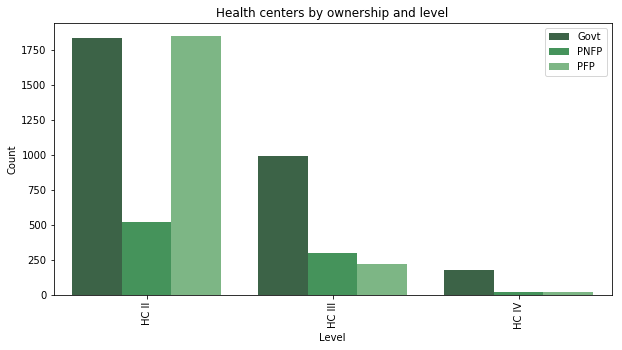

In [8]:
%matplotlib inline
hc = ['HC III', 'HC IV', 'HC II']
hosp = ['Hospital','Regional referral hospital', 'National referral hospital']

plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hc)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Health centers by ownership and level")
_ = plt.legend()


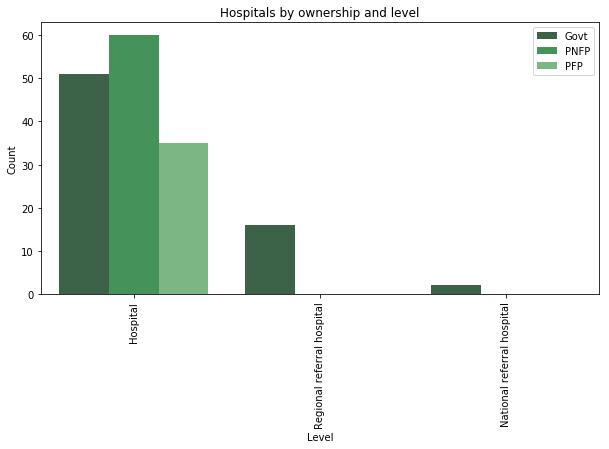

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='level', 
              hue='ownership', 
              data=facilities[facilities.level.isin(hosp)], palette="Greens_d")
_ = plt.xlabel("Level")
_ = plt.xticks(rotation=90)
_ = plt.ylabel("Count")
_ = plt.title("Hospitals by ownership and level")
_ = plt.legend()

In [10]:
# Facilities by hard-to-reach-hard-to-stay - absolute
reload(su)
print su.pt(
    pd.crosstab(
        facilities.is_hard_to_reach,
        [facilities.level]).T, 
    ["Not HTR", "HTR"], 
    "Facilities by hard-to-reach, abs.")



        Facilities by hard-to-reach, abs.         

|                            |   Not HTR |   HTR |
|:---------------------------|----------:|------:|
| Blood bank                 |         7 |     1 |
| Clinic                     |       199 |    58 |
| HC II                      |      3643 |   543 |
| HC III                     |      1287 |   208 |
| HC IV                      |       180 |    32 |
| Hospital                   |       127 |    19 |
| National referral hospital |         2 |     0 |
| Other                      |         6 |     0 |
| Regional referral hospital |        14 |     2 |
| Specialty clinic           |        24 |     2 |


In [11]:
# Facilities by hard-to-reach-hard-to-stay - per capita
reload(su)

# get population sizes
htr_pop = districts[districts.is_hard_to_reach == 1].population.sum()
non_htr_pop = districts[districts.is_hard_to_reach == 0].population.sum()

print su.pt(
    pd.DataFrame([[htr_pop,non_htr_pop]],
                 columns=['HTR', 'Non-HTR'],
                 index=['Population'])
    .applymap(su.fmt2sf), title="Population in HTR and non-HTR areas"
)

# make a 1-by-2 matrix; divide by 100,000 for per-100k
y = [[htr_pop/100000.0],[non_htr_pop/100000.0]]

# matrix division
x = np.divide(pd.crosstab(
    facilities.is_hard_to_reach, 
    [facilities.level]), 
    y)

# round to ~2 sigfig
x = x.applymap(su.fmt2sf)

print su.pt(x.T, ["Not HTR", "HTR"], "Facilities by hard-to-reach per 100k pop")



Population in HTR and non-HTR areas

|            | HTR   | Non-HTR   |
|:-----------|:------|:----------|
| Population | 53m   | 284m      |


     Facilities by hard-to-reach per 100k pop     

|                            |   Not HTR |   HTR |
|:---------------------------|----------:|------:|
| Blood bank                 |      0.13 |  0    |
| Clinic                     |      3.7  |  0.2  |
| HC II                      |     68    |  1.9  |
| HC III                     |     24    |  0.73 |
| HC IV                      |      3.4  |  0.11 |
| Hospital                   |      2.4  |  0.07 |
| National referral hospital |      0.04 |  0    |
| Other                      |      0.11 |  0    |
| Regional referral hospital |      0.26 |  0.01 |
| Specialty clinic           |      0.45 |  0.01 |


# Facilites added through employment records

In [12]:
import json
d = json.loads(facilities.iloc[2216].to_json()) # This is Kampala Independent Hospital, which has a similar profile
d['name'] = 'Kidac General Hospital'
facilities = facilities.append(d, ignore_index=True)

In [13]:
# drop the db_index row
facilities = facilities.drop('db_id', axis=1)

In [14]:
facilities = facilities.reset_index()
facilities = facilities.rename(columns={"index": "facility_id"})


In [15]:
facilities

,facility_id,id_within_district,hsd,name,level,authority,ownership,nhpi_code,hsdt_code,source,...,region_name,population,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala
0,0,1,Labwor HSD,Abim General Hospital,Hospital,MOH,Govt,HFA6Q7GB2,SCL79ULU0/PA95VLAL8/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
1,1,2,Labwor HSD,Adea Health Centre II,HC II,MOH,Govt,HFZW8MEX9,SC5AFV6Y8/PALG8WW26/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
2,2,3,Labwor HSD,Alerek Health Centre III,HC III,MOH,Govt,HF7929IC0,SC6R9JA36/PAPF4WK97/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
3,3,4,Labwor HSD,Amita Health Centre II,HC II,MOH,Govt,HF6UQL949,SC4CK4A96/PAU7GHJT5/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
4,4,5,Labwor HSD,Atunga Health Centre II,HC II,MOH,Govt,HFVQXNJN9,SC4CK4A96/PA9LUCGP9/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
5,5,6,Labwor HSD,Awach Health Centre II,HC II,MOH,Govt,HF5ZOVFS0,SCWMDZEF2/PAL7LLZT2/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
6,6,7,Labwor HSD,Gangming Health Centre II,HC II,MOH,Govt,HFX6RDUQ8,SCWMDZEF2/PA5JNW5M5/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
7,7,8,Labwor HSD,Kanu Health Centre II,HC II,Protestant,PNFP,HFHGZKEV7,SC4CK4A96/PAA9PZSO4/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
8,8,9,Labwor HSD,Katabok (Abim) Health Centre II,HC II,MOH,Govt,HFZE86YY7,SC5AFV6Y8/PAPPIFJD6/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
9,9,10,Labwor HSD,Kiru Health Centre II,HC II,MOH,Govt,HFCASI731,SCL79ULU0/PAL37W5L0/8001,mohdhi2017,...,Northern Region,1.294000e+05,1.0,6810.526367,108700.244141,1.0,2.0,0.742,0.0,840.0
